# Proyek Analisis Data [Bike-sharing-dataset]

- **Nama**       : Noufal Zaidan
- **Email**      : noufal1305@gmail.com
- **ID Dicoding**: enzeeed

# Menentukan Pertanyaan Bisnis
====================================================
#### 1. Pada Bulan dan Tahun Berapa Rental Sepeda Menunjukkan Angka Tertinggi?
#### 2. Apakah Perubahan Musim Di Bumi Mempengaruhi Jumlah Rental Sepeda?
#### 3. Bagaimana Perbandingan Rata-Rata Rental Sepeda Pada Hari kerja vs Hari libur
#### 4. Bagaimana Tren Penggunaan Sepeda Setiap Tahunnya?

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Wragling Data

## Gathering Data

In [2]:
def import_csv(data):
    csv = pd.read_csv(data)
    print(f"Berhasil Import data {data}")
    return csv

In [3]:
data_day = import_csv("day.csv")
data_hour = import_csv("hour.csv")

Berhasil Import data day.csv
Berhasil Import data hour.csv


In [4]:
data_day.head(50)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [5]:
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assesing Data

### Table Data Hour

In [6]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
print("Data Yang Nilainya Null:")
data_hour.isna().sum()

Data Yang Nilainya Null:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Data Yang Nilainya Duplicated:")
data_hour.duplicated().sum()

Data Yang Nilainya Duplicated:


0

### Table Data Day

In [9]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
print("Data Yang Nilainya Null:")
data_day.isna().sum()

Data Yang Nilainya Null:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Data Yang Nilainya Duplicated")
data_day.duplicated().sum()

Data Yang Nilainya Duplicated


0

## Cleaning Data

In [12]:
# Mengubah Tipe data dari object ke datetime pada data hour
data_hour["dteday"] = pd.to_datetime(data_hour["dteday"])

In [13]:
# Mengubah Tipe data dari object ke datetime pada data day
data_day["dteday"] = pd.to_datetime(data_day["dteday"])

# Exploratory Data Analysis (EDA)

## Explore data_hour

In [14]:
data_hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12838,12839,2012-06-24,3,1,6,3,0,0,0,2,0.66,0.6212,0.65,0.0896,19,41,60
1238,1239,2011-02-24,1,0,2,17,0,4,1,3,0.36,0.3485,0.66,0.1940,9,168,177
8442,8443,2011-12-23,1,0,12,10,0,5,1,1,0.40,0.4091,0.62,0.3582,8,96,104
12865,12866,2012-06-25,3,1,6,6,0,1,1,1,0.64,0.5909,0.78,0.1642,11,147,158
9210,9211,2012-01-24,1,1,1,16,0,2,1,1,0.40,0.4091,0.71,0.1343,35,243,278


In [15]:
data_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [16]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [17]:
data_hour.groupby(by="season").agg({
    "instant" : "nunique",
    "cnt" : ["min", "max", "mean", "std"]
})

instant cnt                             
       nunique min  max        mean         std
season                                         
1         4242   1  801  111.114569  119.224010
2         4409   1  957  208.344069  188.362473
3         4496   1  977  236.016237  197.711630
4         4232   1  967  198.868856  182.967972

In [18]:
data_hour.groupby(by="yr").agg({
    "instant" : "nunique",
    "cnt" : ["min", "max", "mean", "std"]
})

instant cnt                             
   nunique min  max        mean         std
yr                                         
0     8645   1  651  143.794448  133.797854
1     8734   1  977  234.666361  208.910941

In [19]:
data_hour.groupby(by="holiday").agg({
    "instant" : "nunique",
    "cnt" : ["min", "max", "mean", "std"]
})

instant cnt                            
        nunique min  max       mean         std
holiday                                        
0         16879   1  977  190.42858  181.981435
1           500   1  712  156.87000  156.757478

In [20]:
data_hour.groupby(by="weekday").agg({
    "instant" : "nunique",
    "cnt" : ["min", "max", "mean", "std"]
})

instant cnt                             
        nunique min  max        mean         std
weekday                                         
0          2502   1  776  177.468825  168.167710
1          2479   1  968  183.744655  179.514167
2          2453   1  970  191.238891  187.820480
3          2475   1  977  191.130505  190.894464
4          2471   1  976  196.436665  188.011923
5          2487   1  957  196.135907  174.076894
6          2512   1  783  190.209793  179.820569

In [21]:
data_hour.groupby(by="workingday").agg({
    "instant" : "nunique",
    "cnt" : ["min", "max", "mean", "std"]
})

instant cnt                             
           nunique min  max        mean         std
workingday                                         
0             5514   1  783  181.405332  172.853832
1            11865   1  977  193.207754  185.107477

**Insight**
- Berdasarkan Musimnya Nilai Tertinggi PerJam Rental Sepeda Sebanyak 977 Pada Musim Fall
- Berdasarkan Tahunny Nilai Tertinggi Perjam Rental Sepeda Terjadi Pada Tahun 2011 Sebanyak 655 dan 2012 Sebanyak 977
- Berdasarkan Holiday Nilai Tertinggi Perjan Rental Sepeda Berada Di Angka 712
- Berdasarkan Harinya Nilai Tertinggi Perjam Rental Sepeda Berada Di Angka 977 Pada Hari Rabu
- Berdasarkan Hari Kerja Nilai Tertinggi Perjam Rental Sepeda Berada Di Angka 977

In [22]:
data_day.groupby(by="season").agg({
    "instant" : "nunique",
    "cnt" : ["min", "max", "mean", "std"]
})

instant   cnt                                
       nunique   min   max         mean          std
season                                              
1          181   431  7836  2604.132597  1399.942119
2          184   795  8362  4992.331522  1695.977235
3          188  1115  8714  5644.303191  1459.800381
4          178    22  8555  4728.162921  1699.615261

In [23]:
data_day.groupby(by="yr").agg({
    "instant" : "nunique",
    "cnt" : ["min", "max", "mean", "std"]
})

instant  cnt                                
   nunique  min   max         mean          std
yr                                             
0      365  431  6043  3405.761644  1378.753666
1      366   22  8714  5599.934426  1788.667868

In [24]:
data_day.groupby(by="holiday").agg({
    "instant" : "nunique",
    "cnt" : ["min", "max", "mean", "std"]
})

instant   cnt                                
        nunique   min   max         mean          std
holiday                                              
0           710    22  8714  4527.104225  1929.013947
1            21  1000  7403  3735.000000  2103.350660

In [25]:
data_day.groupby(by="weekday").agg({
    "instant" : "nunique",
    "cnt" : ["min", "max", "mean", "std"]
})

instant   cnt                                
        nunique   min   max         mean          std
weekday                                              
0           105   605  8227  4228.828571  1872.496629
1           105    22  7525  4338.123810  1793.074013
2           104   683  7767  4510.663462  1826.911642
3           104   441  8173  4548.538462  2038.095884
4           104   431  7804  4667.259615  1939.433317
5           104  1167  8362  4690.288462  1874.624870
6           105   627  8714  4550.542857  2196.693009

In [26]:
data_day.groupby(by="workingday").agg({
    "instant" : "nunique",
    "cnt" : ["min", "max", "mean", "std"]
})

instant  cnt                                
           nunique  min   max         mean          std
workingday                                             
0              231  605  8714  4330.168831  2052.141245
1              500   22  8362  4584.820000  1878.415583

**Insight**
- Pada data day season terdapat 188 data dimana angka max tertinggi diantara season yang lain dan mempunyai rata-rata yang paling tinggi pula
- Pada day year terdapat lonjakkan tren tinggi pada peminatan orang terhadap sepeda
- Pada data holiday menunjukkan bahwa tedapat 21 data saja dimana max tertinggi dipegang oleh non holiday tetapi Standar Deviasi tertinggi masih dipegang holiday
- Pada data weekday diketahui bahwa hari jumat merupakan hari dimana orang-orang lebih banyak untuk merental sepeda
- Pada data workingday dapat disimpulkan bahwa hari workingday mempunyai 2x data lebih banyak ketimbang non working day sehingga mean tertinggi dipegang oleh working day, tetapi nilai tertinggi orang" merental sepeda terdapat pada data non working day sebanyak 8714 dan min datanya 605 dimana saat workingday data min cuman hanya 22 saja

## Visualization & Explanatory Analysis

In [27]:
data_monthly = data_day.resample('M', on='dteday').agg({
    'cnt': 'sum', 
    'windspeed': 'mean',
    'temp': 'mean',
})

In [28]:
data_monthly = data_monthly.reset_index()

In [29]:
data_monthly.head()

,dteday,cnt,windspeed,temp
0,2011-01-31,38189,0.195419,0.197707
1,2011-02-28,48215,0.228568,0.282540
2,2011-03-31,64045,0.232408,0.331667
3,2011-04-30,94870,0.244216,0.471188
4,2011-05-31,135821,0.181274,0.577231


#### 1. Pada Bulan dan Tahun Berapa Rental Sepeda Menunjukkan Angka Tertinggi? Pada Tahun 2011 Peningkatan Tren Rental Sepeda terjadi pada bulan Juli 2011, dimana pada musim tersebut sudah memasuki musim panas

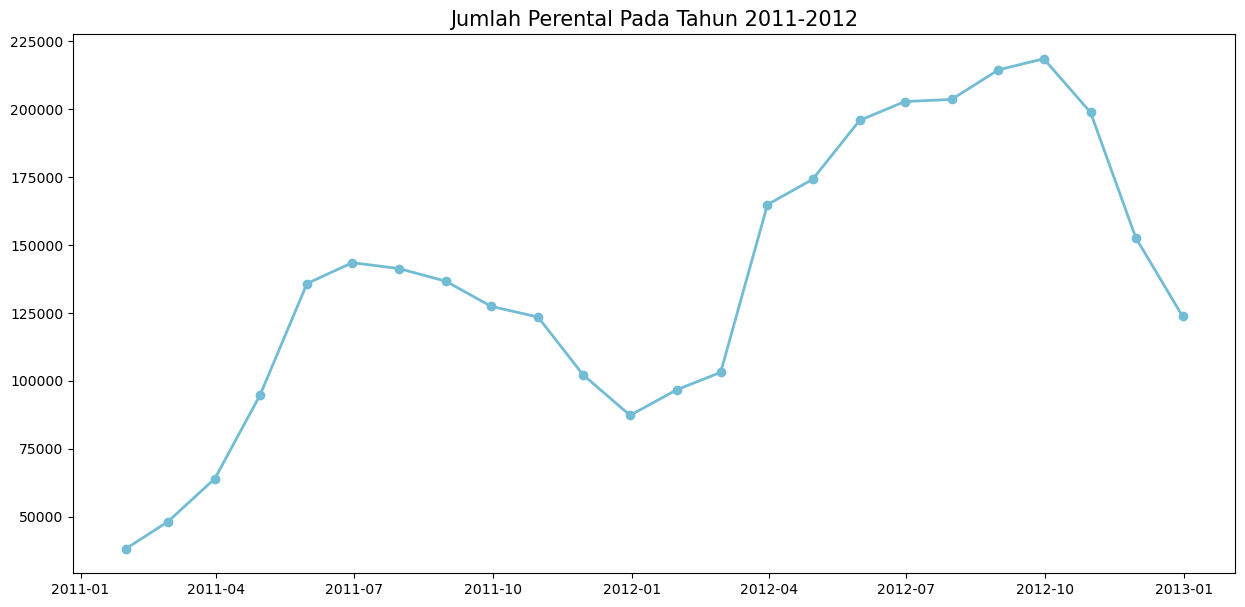

In [30]:
plt.figure(figsize=(15,7))
plt.plot(data_monthly["dteday"], data_monthly["cnt"], marker="o", linewidth=2, color="#72BCD4")
         
plt.title("Jumlah Perental Pada Tahun 2011-2012", loc="center", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show();

In [31]:
season_data = data_day.groupby(by="season")["cnt"].sum().reset_index()

In [32]:
nama_musim = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
season_data["season"] = season_data["season"].replace(nama_musim)

In [33]:
season_data.head()

,season,cnt
0,Winter,471348
1,Spring,918589
2,Summer,1061129
3,Fall,841613


In [34]:
warnings.filterwarnings("ignore")

#### 2. Apakah Perubahan Musim Di Bumi Mempengaruhi Jumlah Rental Sepeda? Ya, bisa dilihat pada grafik dibawah, ketika Winter tidak banyak orang yang melakukan perentalan sepeda

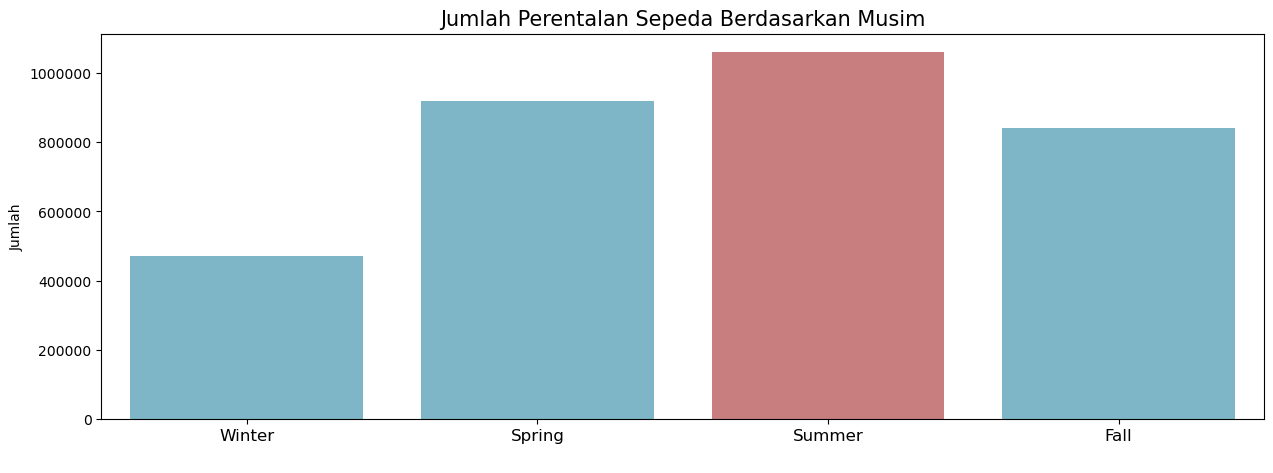

In [35]:
plt.figure(figsize=(15,5))

max_value = season_data["cnt"].max()
colors = ["#72BCD4" if cnt < max_value else "#D47272" for cnt in season_data["cnt"]]
sns.barplot(data=season_data, x="season", y="cnt", palette=colors)

plt.ticklabel_format(style='plain', axis='y')
plt.title("Jumlah Perentalan Sepeda Berdasarkan Musim", fontsize=15,)
plt.tick_params(axis="x", labelsize=12)
plt.ylabel("Jumlah")
plt.xlabel(" ")
plt.show()

#### 3. Bagaimana Perbandingan Rata-Rata Pendapat Rental Sepeda Pada Hari kerja vs Hari libur

In [36]:
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [37]:
data_mean_workingday = data_day.groupby(by="workingday")["cnt"].mean().reset_index()

In [38]:
workingday_rename = {1: "Hari Kerja", 0: "Hari Libur"}
data_mean_workingday["workingday"] = data_mean_workingday["workingday"].replace(workingday_rename)

In [39]:
data_mean_workingday

,workingday,cnt
0,Hari Libur,4330.168831
1,Hari Kerja,4584.820000


In [72]:
hari_libur_value = data_mean_workingday.loc[data_mean_workingday["workingday"] == "Hari Libur", "cnt"].values[0]
print(hari_libur_value)

4330.168831168831


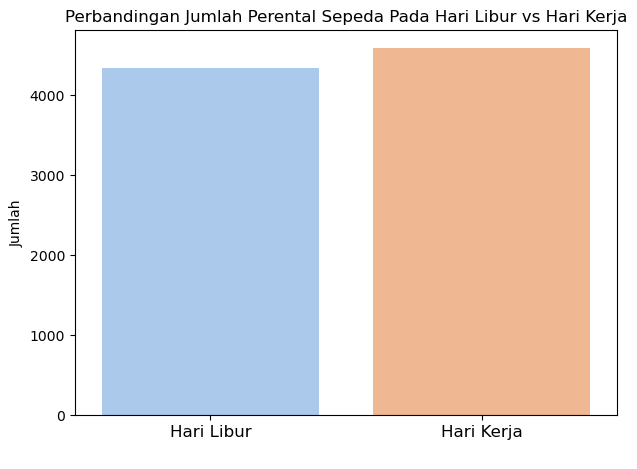

In [40]:
plt.figure(figsize=(7,5))
sns.barplot(data=data_mean_workingday, x="workingday", y="cnt", palette="pastel")

plt.title("Perbandingan Jumlah Perental Sepeda Pada Hari Libur vs Hari Kerja", fontsize=12,)
plt.tick_params(axis="x", labelsize=12)
plt.ylabel("Jumlah")
plt.xlabel(" ")
plt.show()

#### 4. Bagaimana Tren Penggunaan Sepeda Setiap Tahunnya? Dari data dibawah dapat disimpulkan bahwa pada tahun 2011 ke 2012 terjadi kenaikan tren sebanyak 64,9%

In [41]:
data_yearly = data_day.resample('Y', on='dteday').agg({
    'cnt': 'sum', 
    'windspeed': 'mean',
    'temp': 'mean',
})

In [42]:
data_yearly

,cnt,windspeed,temp
dteday,,,
2011-12-31,1243103,0.191403,0.486665
2012-12-31,2049576,0.189572,0.504081


In [43]:
tren_tahun = ((data_yearly["cnt"][1] - data_yearly["cnt"][0]) / data_yearly["cnt"][0]) * 100
print(f"Kenaikan Tren Sebanyak: {round(tren_tahun, 1)}%")

Kenaikan Tren Sebanyak: 64.9%


In [44]:
data_yearly = data_yearly.reset_index()

In [45]:
data_yearly["dteday"] = data_yearly["dteday"].dt.strftime('%Y')

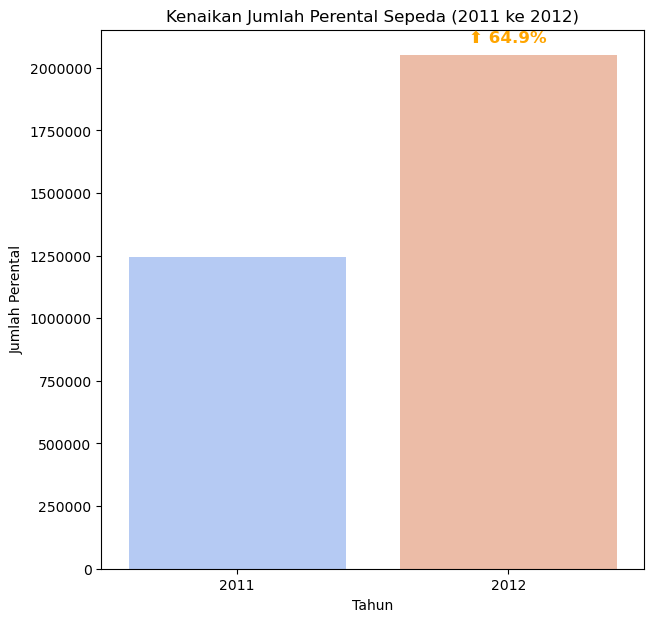

In [46]:
plt.figure(figsize=(7, 7))
ax = sns.barplot(data=data_yearly, x="dteday", y="cnt", palette="coolwarm")

ax.text(1, data_yearly["cnt"][1] + 50000, f"⬆ {round(tren_tahun,1)}%" ,ha='center', fontsize=12, color='orange', fontweight='bold')

plt.ticklabel_format(style='plain', axis='y')
plt.title("Kenaikan Jumlah Perental Sepeda (2011 ke 2012)")
plt.ylabel("Jumlah Perental")
plt.xlabel("Tahun")

plt.show()

## Analisis Lanjutan

In [47]:
data_2011 = data_day[data_day["dteday"].dt.year == 2011]

In [48]:
def bin_wind(windspeed):
    if windspeed < 0.1:
        return "Angin Pelan"
    elif windspeed < 0.3:
        return "Angin Sedang"
    else:
        return "Angin Kencang"

In [49]:
data_2011["Wind Category"] = data_2011["windspeed"].apply(bin_wind)

In [50]:
data_2011_wndctg = data_2011.groupby(by="Wind Category", as_index=False)["cnt"].mean()

In [51]:
data_2011_wndctg.head()

,Wind Category,cnt
0,Angin Kencang,2593.558824
1,Angin Pelan,3782.150000
2,Angin Sedang,3448.920962


In [52]:
data_2011[data_2011["Wind Category"] == "Angin Kencang"]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Wind Category
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,Angin Kencang
11,12,2011-01-12,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.304627,25,1137,1162,Angin Kencang
12,13,2011-01-13,1,0,1,0,4,1,1,0.165000,0.150883,0.470417,0.301000,38,1368,1406,Angin Kencang
20,21,2011-01-21,1,0,1,0,5,1,1,0.177500,0.157833,0.457083,0.353242,75,1468,1543,Angin Kencang
38,39,2011-02-08,1,0,2,0,2,1,1,0.220833,0.198246,0.537917,0.361950,64,1466,1530,Angin Kencang
44,45,2011-02-14,1,0,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,208,1705,1913,Angin Kencang
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635,Angin Kencang
51,52,2011-02-21,1,0,2,1,1,0,2,0.303333,0.284075,0.605000,0.307846,195,912,1107,Angin Kencang
55,56,2011-02-25,1,0,2,0,5,1,2,0.364348,0.350461,0.712174,0.346539,120,1341,1461,Angin Kencang
60,61,2011-03-02,1,0,3,0,3,1,1,0.335000,0.320071,0.449583,0.307833,231,1903,2134,Angin Kencang


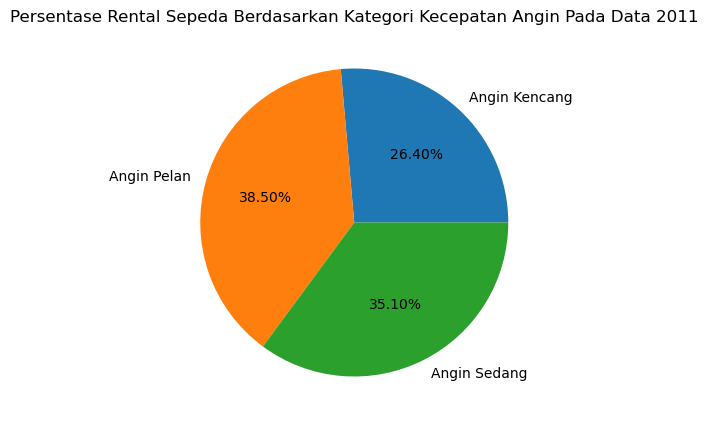

In [53]:
plt.figure(figsize=(12,5))
plt.pie(x=data_2011_wndctg["cnt"], labels=data_2011_wndctg["Wind Category"], autopct='%.2f%%')

plt.title("Persentase Rental Sepeda Berdasarkan Kategori Kecepatan Angin Pada Data 2011")
plt.show()

In [54]:
data_2012 = data_day[data_day["dteday"].dt.year == 2012]

In [55]:
data_2012["Wind Category"] = data_2012["windspeed"].apply(bin_wind)

In [56]:
data_2012_wndctg = data_2012.groupby(by="Wind Category", as_index=False)["cnt"].mean()

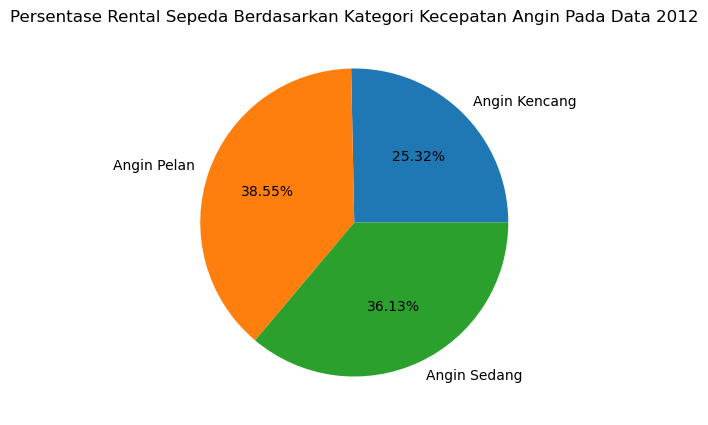

In [57]:
plt.figure(figsize=(12,5))
plt.pie(x=data_2012_wndctg["cnt"], labels=data_2012_wndctg["Wind Category"], autopct='%.2f%%')

plt.title("Persentase Rental Sepeda Berdasarkan Kategori Kecepatan Angin Pada Data 2012")
plt.show()

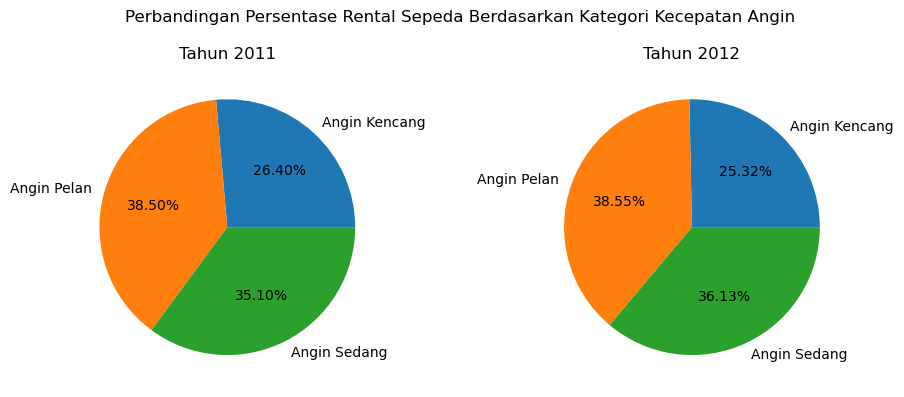

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].pie(
    x=data_2011_wndctg["cnt"], 
    labels=data_2011_wndctg["Wind Category"], 
    autopct='%.2f%%'
)
axes[0].set_title("Tahun 2011")

axes[1].pie(
    x=data_2012_wndctg["cnt"], 
    labels=data_2012_wndctg["Wind Category"], 
    autopct='%.2f%%'
)
axes[1].set_title("Tahun 2012")

fig.suptitle("Perbandingan Persentase Rental Sepeda Berdasarkan Kategori Kecepatan Angin")
plt.subplots_adjust(top=0.5)  
plt.tight_layout()
plt.show()

In [59]:
data_2011_weekday = data_2011.groupby(by="weekday", as_index=False)["cnt"].sum()

In [60]:
data_2011_weekday.head()

,weekday,cnt
0,0,177074
1,1,180221
2,2,180338
3,3,169169
4,4,174552


In [61]:
day_rename = {0 : "Minggu", 1: "Senin", 2:"Selasa", 3:"Rabu", 4:"Kamis", 5:"Jum'at", 6:"Sabtu"}
data_2011_weekday["weekday"] = data_2011_weekday["weekday"].replace(day_rename)

In [62]:
top_3 = data_2011_weekday.nlargest(3, "cnt").values
colors = ["orange" if day in top_3 else "gray" for day in data_2011_weekday["weekday"]]

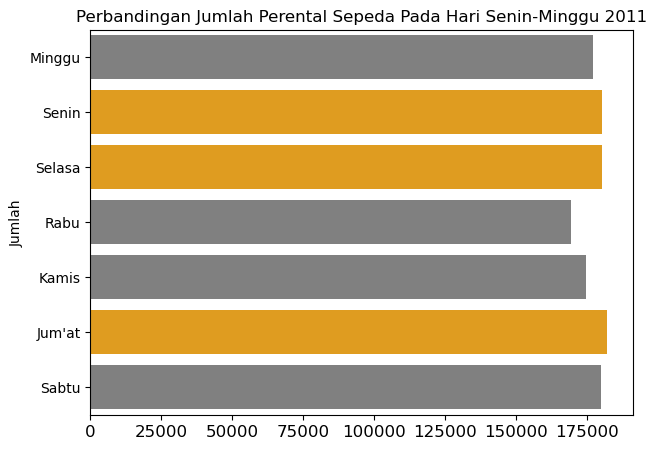

In [63]:
plt.figure(figsize=(7,5))
sns.barplot(data=data_2011_weekday, x="cnt", y="weekday", palette=colors)

plt.title("Perbandingan Jumlah Perental Sepeda Pada Hari Senin-Minggu 2011", fontsize=12,)
plt.tick_params(axis="x", labelsize=12)
plt.ylabel("Jumlah")
plt.xlabel(" ")
plt.show()

In [64]:
data_2012_weekday = data_2012.groupby(by="weekday", as_index=False)["cnt"].sum()
day_rename = {0 : "Minggu", 1: "Senin", 2:"Selasa", 3:"Rabu", 4:"Kamis", 5:"Jum'at", 6:"Sabtu"}
data_2012_weekday["weekday"] = data_2012_weekday["weekday"].replace(day_rename)
top_3_2012= data_2012_weekday.nlargest(3, "cnt").values
colors_2012 = ["orange" if day in top_3_2012 else "gray" for day in data_2011_weekday["weekday"]]

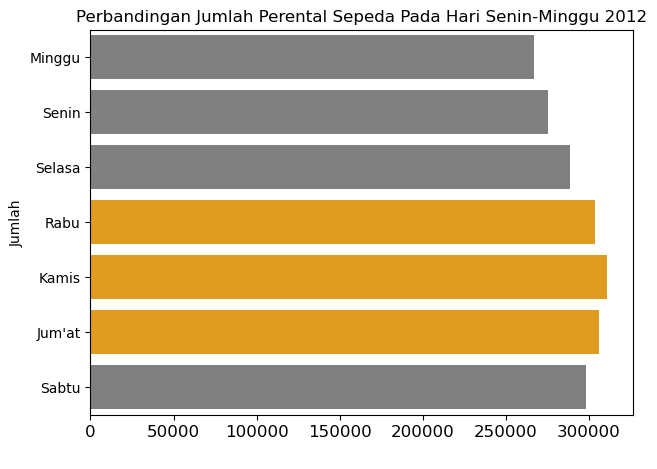

In [65]:
plt.figure(figsize=(7,5))
sns.barplot(data=data_2012_weekday, x="cnt", y="weekday", palette=colors_2012)

plt.title("Perbandingan Jumlah Perental Sepeda Pada Hari Senin-Minggu 2012", fontsize=12,)
plt.tick_params(axis="x", labelsize=12)
plt.ylabel("Jumlah")
plt.xlabel(" ")
plt.show()

# Conclusion

- Titik Tertinggi Perentalan Sepeda Pada Tahun 2011 Terjadi Pada Bulan Juli, Sementara Titik Tertinggi Perentalan Sepeda Pada Tahun 2012 Terjadi Pada Bulan Oktober

- Perubahan Musim Di Bumi Mempengaruhi Jumlah Perentalan Sepeda, Dimana Diketahui Titik Tertinggi Terjadi Pada Musim Summer Sementara Titik Terendah Berada Pada Musim Winter, Karena Pada Musim Winter Bukanlah Waktu Yang Tepat Untuk Melakukan Olahraga Outdoor Seperti Sepedaan

- Rata-Rata Jumlah Perentalan Sepeda Pada Hari Kerja dan Hari Libur Memiliki Selisih Yang Tidak Terlalu Jauh, Maka Dari Itu Dapat Disimpulkan Bahwa Pada Hari Kerja Pun Orang-Orang Masih Menyempatkan Olahraga Sepedaan Pada Hari Kerja

- Tren Sepedaan Meningkat Sebanyak 64,9% Dari Tahun 2011 Ke Tahun 2012. Maka Dapat Disimpulkan Bahwa Semakin Banyak Orang-Orang Yang Menyukai Olahraga Dengan Cara Bersepeda
